In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('../data/netflix_titles.csv')
df.head()
# df['listed_in'].unique()[:20]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# Find movies released after 2015 with genre = "Drama".
df_new = df.copy()
df_new['genre'] = df_new["listed_in"].str.split(", ").apply(lambda x:[g for g in x if g in ["Dramas"]]).str[0]
df_new
df_drama = df_new[ (df_new['type'] == "Movie") &
    (df_new['release_year'] > 2015) & 
            (df_new['genre'] == "Dramas") ]
df_drama[['show_id', 'title', 'genre', 'release_year', 'genre']]

,show_id,title,genre,release_year,genre
9,s10,The Starling,Dramas,2021,Dramas
12,s13,Je Suis Karl,Dramas,2021,Dramas
30,s31,Ankahi Kahaniya,Dramas,2021,Dramas
35,s36,The Father Who Moves Mountains,Dramas,2021,Dramas
36,s37,The Stronghold,Dramas,2021,Dramas
...,...,...,...,...,...
8753,s8754,Withdrawn,Dramas,2017,Dramas
8754,s8755,Wolves,Dramas,2016,Dramas
8762,s8763,Wrong Side Raju,Dramas,2016,Dramas
8774,s8775,يوم الدين,Dramas,2018,Dramas


In [16]:
# Clean “duration” column → convert "90 min" to integer minutes 
df_clean = df.copy()
df_clean_dur = df_clean[(df_clean['type'] == "Movie")]
df_clean_dur['new_duration'] = df_clean_dur["duration"].str.split(" min").str[0]
df_clean_dur
df_clean_dur['new_duration_numeric'] = pd.to_numeric(df_clean_dur['new_duration'])
df_clean_dur.dtypes
df_clean['duration_min'] = df_clean_dur['new_duration_numeric']
df_clean


# # Alternate solution
# df_clean['duration_min'] = pd.to_numeric(
#     df_clean['duration'].str.replace(" min", "", regex=False), errors='ignore'
# )
# df_clean


C:\Users\parag\AppData\Local\Temp\ipykernel_14216\1734619865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_dur['new_duration'] = df_clean_dur["duration"].str.split(" min").str[0]
C:\Users\parag\AppData\Local\Temp\ipykernel_14216\1734619865.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_dur['new_duration_numeric'] = pd.to_numeric(df_clean_dur['new_duration'])


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0


In [98]:
# Find the average duration of movies per year.
df_clean['duration_min'] = pd.to_numeric(
    df_clean['duration'].str.replace(" min", "", regex=False), errors='coerce'
)
df_duration = df_clean[(df_clean["duration_min"].notnull())]
df_duration.groupby(['release_year']).agg({'duration_min': 'mean'})

,duration_min
release_year,
1942,35.000000
1943,62.666667
1944,52.000000
1945,51.333333
1946,58.000000
...,...
2017,95.535248
2018,96.185137
2019,93.466035


In [18]:
# Use groupby to see how TV shows have increased year by year.
df_tvshows = df_clean[(df_clean["type"] == 'TV Show')]
df_tvshows.groupby(['release_year']).size()

release_year
1925      1
1945      1
1946      1
1963      1
1967      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      3
1993      4
1994      2
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      5
2002      7
2003     10
2004      9
2005     13
2006     14
2007     14
2008     23
2009     34
2010     40
2011     40
2012     64
2013     63
2014     88
2015    162
2016    244
2017    265
2018    380
2019    397
2020    436
2021    315
dtype: int64

### Graphs and plots

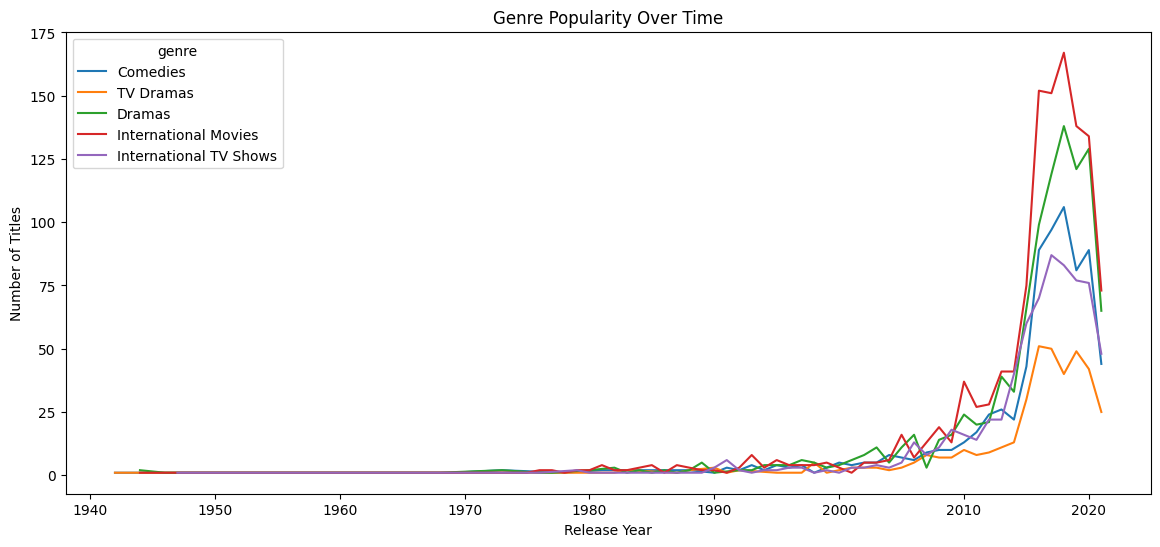

In [14]:
# Genre popularity over time
df_new = df.copy()
df_new['genre'] = df_new["listed_in"].str.split(", ").explode('genre')
genre_by_year = df_new.groupby(['release_year', 'genre']).size().reset_index(name='count')
genre_by_year

plt.figure(figsize=(14,6))
top_genres = genre_by_year.groupby('genre')['count'].sum().nlargest(5).index
sns.lineplot(data=genre_by_year[genre_by_year['genre'].isin(top_genres)], x='release_year', y='count', hue='genre')
plt.title("Genre Popularity Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

C:\Users\parag\AppData\Local\Temp\ipykernel_18028\3091714818.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df_duration['release_year'], df_duration['duration_min'], c=(0.0, 0.4, 1.0, 1.0))


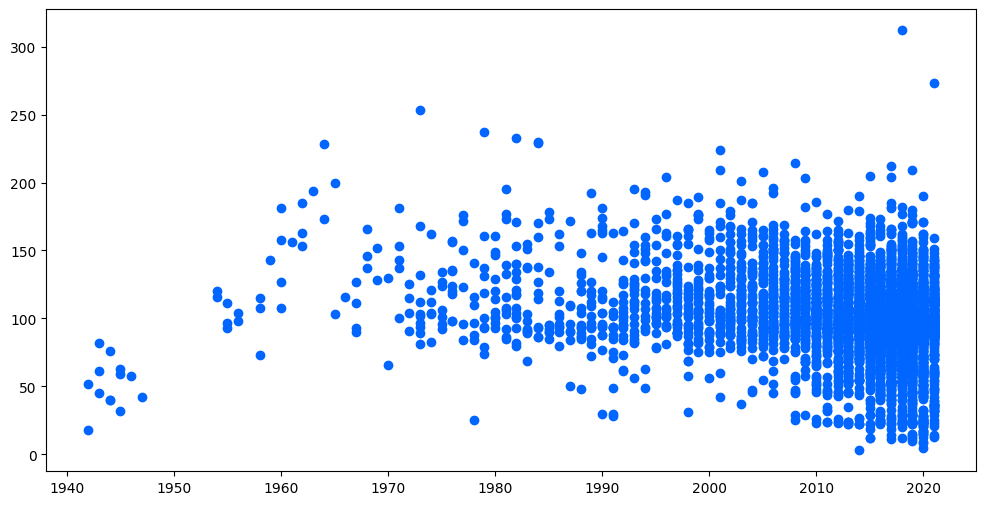

In [45]:
# Correlation between release year and duration
df_clean = df.copy()
df_clean['duration_min'] = pd.to_numeric(
    df_clean['duration'].str.replace(" min", "", regex=False), errors='coerce'
)
df_duration = df_clean[(df_clean["duration_min"].notnull())]
df_duration.groupby(['release_year']).agg({'duration_min': 'sum'})

plt.figure(figsize=(12,6))
plt.scatter(df_duration['release_year'], df_duration['duration_min'], c=(0.0, 0.4, 1.0, 1.0))

C:\Users\parag\AppData\Local\Temp\ipykernel_20080\2505754711.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_movies, x='rating', y='frequency', palette='pastel')


<Axes: xlabel='rating', ylabel='frequency'>

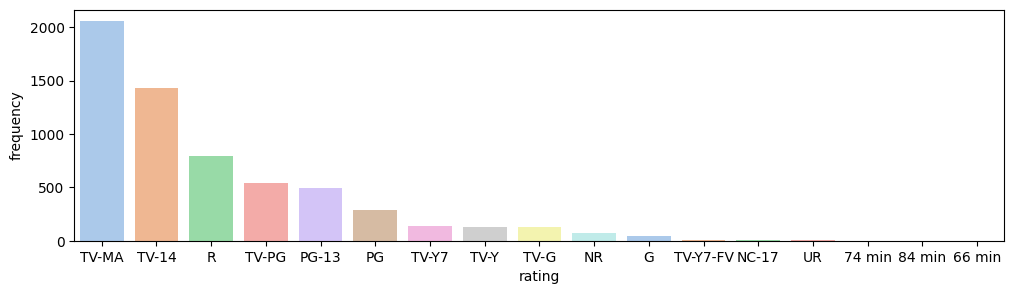

In [27]:
# Count of movies by rating
df.head()
df_ratings = df[df['type'] == 'Movie']
df_movies = df_ratings['rating'].value_counts().reset_index(name='frequency')
df_movies

plt.figure(figsize=(12,3))
sns.barplot(data=df_movies, x='rating', y='frequency', palette='pastel')

<Axes: xlabel='country', ylabel='count'>

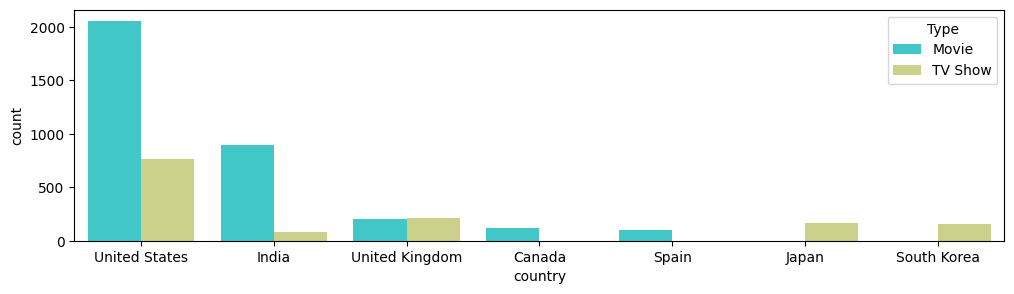

In [28]:
# Stacked bar chart of top 5 countries
movies = df[df['type'] == 'Movie']
tvshow = df[df['type'] == 'TV Show']
topcountriesmovie = movies['country'].value_counts().head(5).reset_index(name = 'count')
topcountriesshow = tvshow['country'].value_counts().head(5).reset_index(name = 'count')

topcountriesmovie.columns = ['country', 'count']
topcountriesshow.columns = ['country', 'count']

topcountriesmovie['Type'] = 'Movie'
topcountriesshow['Type'] = 'TV Show'

combined = pd.concat([topcountriesmovie, topcountriesshow])
combined

plt.figure(figsize=(12,3))
sns.barplot(x = 'country', y='count', hue='Type', data=combined, palette='rainbow')